<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Séries Temporais - Prática 1

Prof. Túlio Ribeiro<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>

MBA em Ciência de Dados<br>
Universidade de Fortaleza

# **1. Análise dos datasets 'Electric_Production.csv' e 'movimentacao_rodoviaria.csv'**

Você recebeu um dataset chamado **Electric_Production.csv** e  **movimentacao_rodoviaria.csv**, que apresenta os dados de produção elétrica em diversos momentos e a quantidade de pessoas estimadas nas rodoviárias, respectivamente. Realize as seguintes tarefas:

## 1.1 Como a produção evoluiu no tempo?
- Crie gráficos que apresentem a evolução da produção elétrica ao longo do tempo.
- Adicione médias móveis (simples, centralizada e exponencial) nos gráficos para analisar a tendência.

## 1.2 O dado é estacionário?
- Verifique a estacionaridade do dado utilizando testes estatísticos, como o **KPSS**.
- Apresente a conclusão com base no p-valor do teste.

## 1.3 O dado apresenta uma distribuição normal?
- Utilize um teste estatístico, como o **Teste de Shapiro-Wilk**


### Observações:
- Para cada item, crie novas células para efetuar seus códigos.
- Nomear variáveis de acordo com o contexto da questão.
- Caso necessário, utilize novas caixas de textos para deixar comentários.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools
import seaborn as sns
import scipy.stats as stats

In [ ]:
def teste_estacionaridade(x):
    kpss = statsmodels.tsa.stattools.kpss(x)
    valor_critico = kpss[3]['5%']
    teste = kpss[0]
    print('kpps = ' + kpss[0].__str__())
    print('Valor crítico = ' + valor_critico.__str__())
    if teste <= valor_critico:
        print('A série é estacionária')
    else:
        print('A série NÃO é estacionária')

def teste_normalidade(x):
    e, p = stats.shapiro(x)
    print('e = ' + e.__str__())
    print('p = ' + p.__str__())
    if p < 0.05:
        print('A distribuição NÃO é normal')
    else:
        print('A distribuição é normal')


# **Electric Production**

In [ ]:
!gdown 1_0buQPyM_CznA5H5qNMzmizP07jVS2r1

Downloading...
From: https://drive.google.com/uc?id=1_0buQPyM_CznA5H5qNMzmizP07jVS2r1
To: /content/Electric_Production.csv
100% 7.32k/7.32k [00:00<00:00, 21.4MB/s]


In [ ]:
df1 = pd.read_csv('Electric_Production.csv')

In [ ]:
df1.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [ ]:
df1['DATE'] = pd.to_datetime(df1['DATE'])
df1.set_index('DATE', inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [ ]:
df1.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [ ]:
df1.index

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=397, freq=None)

# evolução da produção elétrica ao longo do tempo (Com médias moveis)


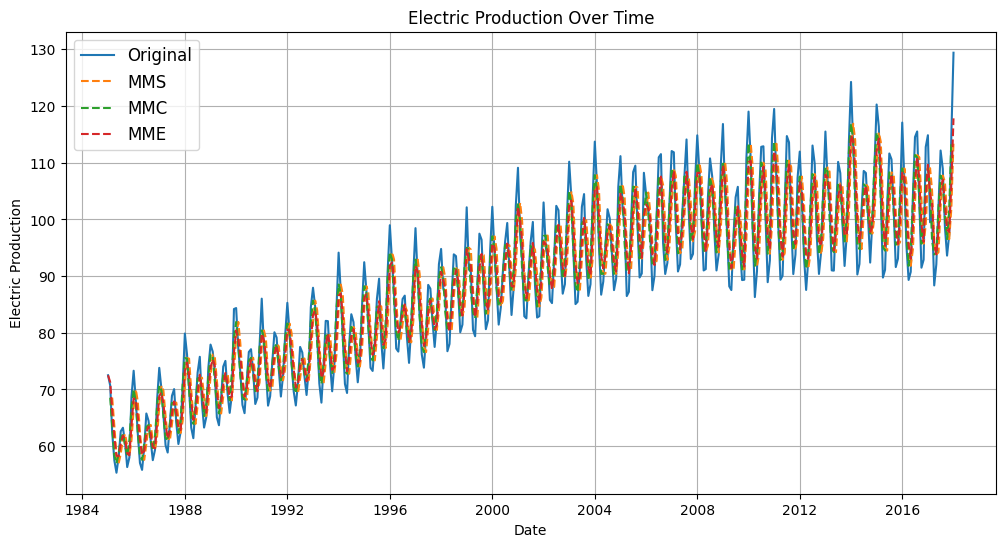

In [ ]:
# prompt: faça um gráfico de linha com o df1

plt.figure(figsize=(12, 6))
plt.plot(df1.index, df1['IPG2211A2N'],label='Original')
plt.plot(df1.index, df1['IPG2211A2N'].rolling(3).mean(),ls='--',label='MMS')
plt.plot(df1.index, df1['IPG2211A2N'].rolling(3, center=True).mean(),ls='--',label='MMC')
plt.plot(df1.index, df1['IPG2211A2N'].ewm(alpha=0.5).mean(),ls='--',label='MME')

plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.title('Electric Production Over Time')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# TESTE ESTACIONÁRIO

In [ ]:
teste_estacionaridade(df1['IPG2211A2N'])

kpps = 3.5315970094994853
Valor crítico = 0.463
A série NÃO é estacionária


<ipython-input-73-5d916de9da5b>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(x)


# Teste de distribuição normal

e = 0.9870730639317014
p = 0.0013348312140416224
A distribuição NÃO é normal


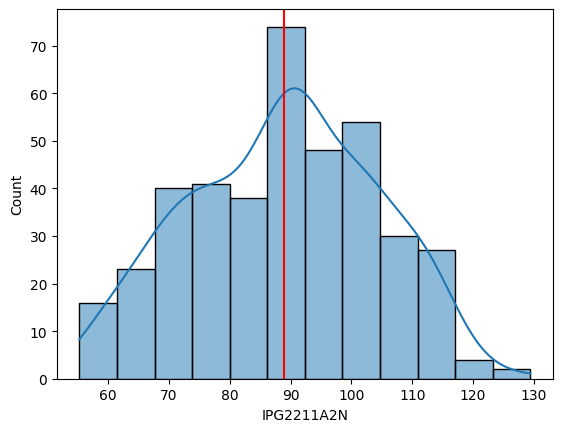

In [ ]:
sns.histplot(data=df1['IPG2211A2N'], kde=True)
plt.axvline(df1['IPG2211A2N'].mean(), color='red')
teste_normalidade(df1['IPG2211A2N'])
plt.show()

# **movimentacao_rodoviaria.csv**

In [ ]:
!gdown 1Z_cggfZctYyRwqOyrkYGlTf5aQM5unND

Downloading...
From: https://drive.google.com/uc?id=1Z_cggfZctYyRwqOyrkYGlTf5aQM5unND
To: /content/movimentacao_rodoviaria.csv
100% 11.8k/11.8k [00:00<00:00, 15.4MB/s]


In [ ]:
df2 = pd.read_csv('movimentacao_rodoviaria.csv', header=None)

In [ ]:
df2.head()

,0,1,2,3
0,jan,JOAO THOMÉ,2012,146120.0
1,jan,JOAO THOMÉ,2013,146405.0
2,jan,JOAO THOMÉ,2014,184145.0
3,jan,JOAO THOMÉ,2015,192590.0
4,jan,JOAO THOMÉ,2016,136208.0


In [ ]:
df2 = df2.rename(columns={0: 'MES',
                          1: 'RODOVIARIA',
                          2: 'ANO',
                          3: 'PESSOAS'})

In [ ]:
df2

,MES,RODOVIARIA,ANO,PESSOAS
0,jan,JOAO THOMÉ,2012,146120.00
1,jan,JOAO THOMÉ,2013,146405.00
2,jan,JOAO THOMÉ,2014,184145.00
3,jan,JOAO THOMÉ,2015,192590.00
4,jan,JOAO THOMÉ,2016,136208.00
...,...,...,...,...
391,dez,MESSEJANA,2018,31364.38
392,dez,MESSEJANA,2019,38652.96
393,dez,MESSEJANA,2020,27195.00
394,dez,MESSEJANA,2021,26732.00


In [ ]:
meses_trans = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5,
               'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10,
               'nov': 11, 'dez': 12}

df2['DATA'] = pd.to_datetime(df2['ANO'].astype(str) + '-' + df2['MES'].map(meses_trans).astype(str))

df2 = df2.sort_values('DATA').reset_index(drop=True)
df2.head()

,MES,RODOVIARIA,ANO,PESSOAS,DATA
0,jan,JOAO THOMÉ,2012,146120.0,2012-01-01
1,jan,ANT. BEZERRA,2012,42000.0,2012-01-01
2,jan,MESSEJANA,2012,18360.0,2012-01-01
3,fev,JOAO THOMÉ,2012,130070.0,2012-02-01
4,fev,ANT. BEZERRA,2012,37530.0,2012-02-01


In [ ]:
df2['DATA']

,DATA
0,2012-01-01
1,2012-01-01
2,2012-01-01
3,2012-02-01
4,2012-02-01
...,...
391,2022-11-01
392,2022-11-01
393,2022-12-01
394,2022-12-01


# evolução da população ao longo do tempo (Com médias moveis)

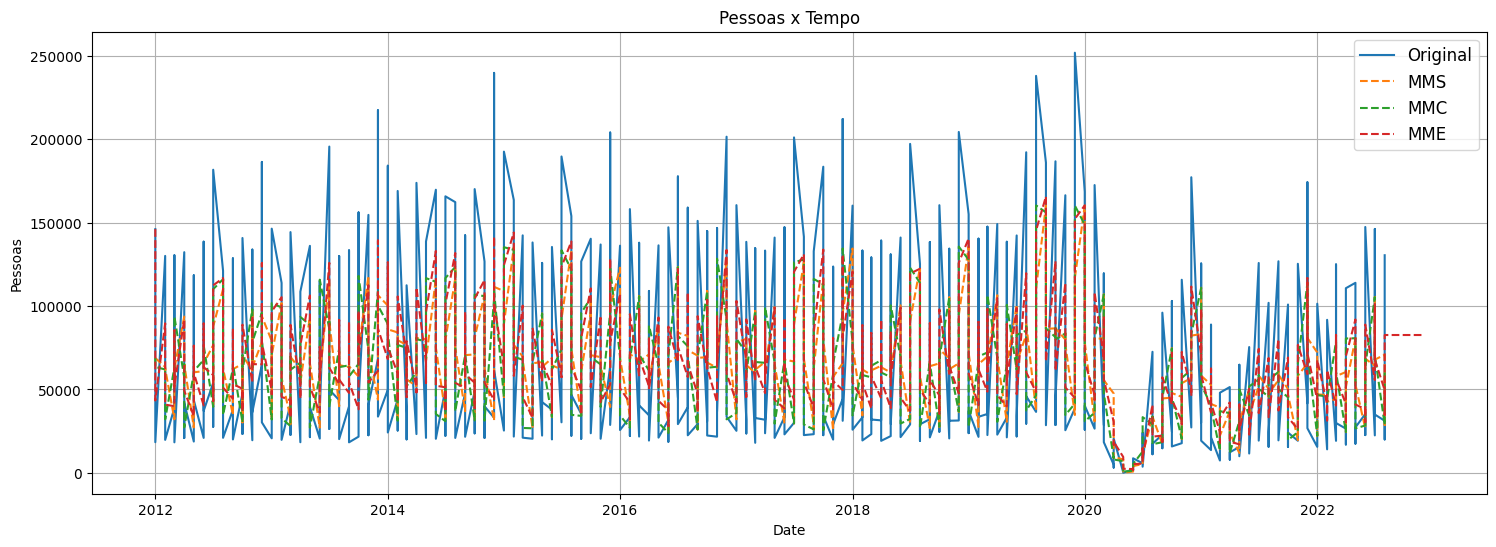

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(df2['DATA'], df2['PESSOAS'],label='Original')
plt.plot(df2['DATA'], df2['PESSOAS'].rolling(3).mean(),ls='--',label='MMS')
plt.plot(df2['DATA'], df2['PESSOAS'].rolling(3, center=True).mean(),ls='--',label='MMC')
plt.plot(df2['DATA'], df2['PESSOAS'].ewm(alpha=0.5).mean(),ls='--',label='MME')
plt.xlabel('Date')
plt.ylabel('Pessoas')
plt.title('Pessoas x Tempo')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# TESTE ESTACIONÁRIO

In [ ]:
teste_estacionaridade(df2['PESSOAS'][df2['PESSOAS'].notnull()])

kpps = 0.6699425600107425
Valor crítico = 0.463
A série NÃO é estacionária


# TESTE DE NORMALIDADE

e = 0.8054175118500111
p = 3.7028945731643045e-21
A distribuição NÃO é normal


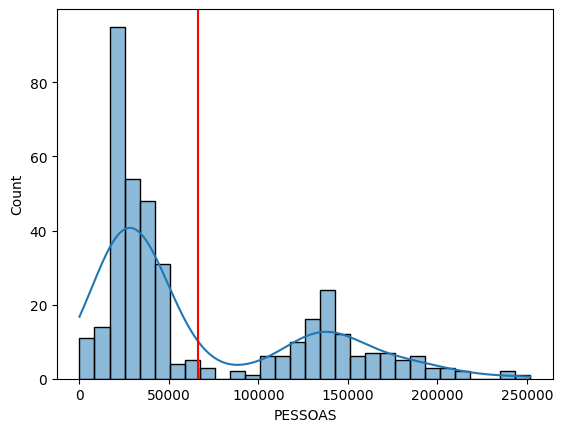

In [ ]:
sns.histplot(data=df2['PESSOAS'], kde=True,bins=30)
plt.axvline(df2['PESSOAS'].mean(), color='red')
teste_normalidade(df2['PESSOAS'][df2['PESSOAS'].notnull()])
plt.show()